In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
file_path = '/Users/apple/Downloads/Customer_Chips.csv'
data = pd.read_csv(file_path)

In [4]:
data.head


<bound method NDFrame.head of               DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_QTY  \
0       2018-10-17          1            1000       1         5         6   
1       2019-05-14          1            1307     348        66         3   
2       2019-05-20          1            1343     383        61         2   
3       2019-05-19          4            4074    2982        57         1   
4       2019-05-16          4            4149    3333        16         1   
...            ...        ...             ...     ...       ...       ...   
264119  2019-03-09        272          272319  270088        89         2   
264120  2018-08-13        272          272358  270154        74         1   
264121  2018-11-06        272          272379  270187        51         2   
264122  2018-12-27        272          272379  270188        42         2   
264123  2018-09-22        272          272380  270189        74         2   

        TOT_SALES                            

In [5]:
Summary = data['Prod_name'].value_counts()
print(Summary)

Kettle Mozzarella Basil & Pesto 175g              3280
Kettle Tortilla ChpsHny&Jlpno Chili 150g          3279
Tyrrells Crisps Ched & Chives 165g                3264
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g          3260
Cobs Popd Sea Salt Chips 110g                     3259
                                                  ... 
Red Rock Deli Chikn&Garlic Aioli 150g             1427
French Fries Potato Chips 175g                    1418
NCC Sour Cream & Garden Chives 175g               1416
WW Crinkle Cut Original 175g                      1410
Doritos Corn Chipsringles SourCream Onion 134g       1
Name: Prod_name, Length: 115, dtype: int64


In [6]:
missing_values = data['Prod_name'].isnull().sum()
print(f'Missing values in Prod_Name: {missing_values}')

Missing values in Prod_Name: 0


In [7]:
unique_products = data['Prod_name'].unique()
print(unique_products)

['Natural ChipCompny SeaSalt175g' 'CCs Nacho Cheese 175g'
 'Smiths Crinkle Cut Chips Chicken 170g'
 'Old El Paso Salsa Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves Sweet Chilli 210g'
 'Doritos Corn Chips Mexican Jalapeno 150g'
 'Grain Waves Sour Cream&Chives 210G' 'Twisties Cheese 270g'
 'WW Crinkle Cut Chicken 175g' 'Thins Chips Light& Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream & Garden Chives 175g'
 'Doritos Corn Chips Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle Original 330g'
 'Infuzions Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt & Vinegar 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Chip Thinly Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Red Rock Deli SR Salsa & Mzzrlla 150g' 'Thins Chips Originl saltd 175g'
 'Red Rock Deli Sp Salt & Truffle 150G'
 'Smiths Thinly Swt Chli&S/Cream175G' 'Kettle Chilli 175g

In [8]:
from fuzzywuzzy import process

In [9]:
def clean_and_split(Prod_name):
    # Remove digits and special characters (numbers , grams and characters)
    cleaned_name = re.sub(r'[\d]+g\b|[\d&]', '', Prod_name)
    
    # Insert space before capital letters in the middle of concatenated words
    cleaned_name = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', cleaned_name)
    
    # Split the product name into words
    words = cleaned_name.split()
    
    
    return words

def correct_spellings(word, choices, cutoff):
    # Use FuzzyWuzzy to get the closest match to the word from the choices
    correct_word, score = process.extractOne(word, choices)
    
    # If the match score is above the cutoff, return the corrected word
    if score > cutoff:
        return correct_word
    else:
        return word

# List of correct spellings
correct_spellings_list = ['Chips']

# Cutoff score for fuzzy matching
cutoff_score = 80

data['corrected_product_words'] = data['Prod_name'].apply(
    lambda name: ' '.join(
        correct_spellings(word, correct_spellings_list, cutoff_score) for word in clean_and_split(name)
    )
)

# Review the results
print(data[['Prod_name', 'corrected_product_words']])

                                       Prod_name  \
0                 Natural ChipCompny SeaSalt175g   
1                          CCs Nacho Cheese 175g   
2          Smiths Crinkle Cut Chips Chicken 170g   
3         Old El Paso Salsa Dip Tomato Mild 300g   
4       Smiths Crinkle Chips Salt & Vinegar 330g   
...                                          ...   
264119     Kettle Sweet Chilli & Sour Cream 175g   
264120              Tostitos Splash Of Lime 175g   
264121                     Doritos Mexicana 170g   
264122  Doritos Corn Chips Mexican Jalapeno 150g   
264123              Tostitos Splash Of Lime 175g   

                    corrected_product_words  
0             Natural Chips Compny Sea Salt  
1                          CCs Nacho Cheese  
2          Smiths Crinkle Cut Chips Chicken  
3         Old El Paso Salsa Dip Tomato Mild  
4         Smiths Crinkle Chips Salt Vinegar  
...                                     ...  
264119       Kettle Sweet Chilli Sour Cream  
264120 

In [10]:
data.head

<bound method NDFrame.head of               DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_QTY  \
0       2018-10-17          1            1000       1         5         6   
1       2019-05-14          1            1307     348        66         3   
2       2019-05-20          1            1343     383        61         2   
3       2019-05-19          4            4074    2982        57         1   
4       2019-05-16          4            4149    3333        16         1   
...            ...        ...             ...     ...       ...       ...   
264119  2019-03-09        272          272319  270088        89         2   
264120  2018-08-13        272          272358  270154        74         1   
264121  2018-11-06        272          272379  270187        51         2   
264122  2018-12-27        272          272379  270188        42         2   
264123  2018-09-22        272          272380  270189        74         2   

        TOT_SALES                            

In [11]:
unique_products = data['corrected_product_words'].unique()
print(unique_products)

['Natural Chips Compny Sea Salt' 'CCs Nacho Cheese'
 'Smiths Crinkle Cut Chips Chicken' 'Old El Paso Salsa Dip Tomato Mild'
 'Smiths Crinkle Chips Salt Vinegar' 'Grain Waves Sweet Chilli'
 'Doritos Corn Chips Mexican Jalapeno' 'Grain Waves Sour Cream Chives G'
 'Twisties Cheese' 'WW Crinkle Cut Chicken' 'Thins Chips Light Tangy'
 'CCs Original' 'Burger Rings' 'NCC Sour Cream Garden Chives'
 'Doritos Corn Chips Southern Chicken' 'Cheezels Cheese Box'
 'Smiths Crinkle Original' 'Infuzions Crn Crnchers Tangy Gcamole'
 'Kettle Sea Salt Vinegar' 'Kettle Tortilla Chips Hny Jlpno Chili'
 'Smiths Chips Thinly Cut Original' 'Kettle Original'
 'Red Rock Deli Thai Chilli Lime' 'Pringles Sthrn Fried Chicken'
 'Red Rock Deli SR Salsa Mzzrlla' 'Thins Chips Originl saltd'
 'Red Rock Deli Sp Salt Truffle G' 'Smiths Thinly Swt Chli S/Cream G'
 'Kettle Chilli' 'Doritos Mexicana' 'Smiths Crinkle Cut French Onion Dip'
 'Natural Chips Co Hony Soy Chckn' 'Doritos Corn Chips Supreme'
 'Twisties Chicken' 'Smi

In [12]:
summ = data['corrected_product_words'].value_counts()
print(summ)

Kettle Mozzarella Basil Pesto            3280
Kettle Tortilla Chips Hny Jlpno Chili    3279
Tyrrells Crisps Ched Chives              3264
Cobs Popd Swt/Chlli Sr/Cream Chips       3260
Cobs Popd Sea Salt Chips                 3259
                                         ... 
Red Rock Deli Chikn Garlic Aioli         1427
French Fries Potato Chips                1418
NCC Sour Cream Garden Chives             1416
WW Crinkle Cut Original                  1410
Doritos Corn Chips Sour Cream Onion         1
Name: corrected_product_words, Length: 115, dtype: int64


In [13]:

#Remove salsa products from 'corrected_product_words' column
# Setting case=False to make the search case-insensitive
data_filtered = data[~data['corrected_product_words'].str.contains('Salsa', case=False)]
print(data_filtered.head())


         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_QTY  \
0  2018-10-17          1            1000       1         5         6   
1  2019-05-14          1            1307     348        66         3   
2  2019-05-20          1            1343     383        61         2   
4  2019-05-16          4            4149    3333        16         1   
5  2019-05-16          4            4196    3539        24         1   

   TOT_SALES                                 Prod_name  \
0        6.0            Natural ChipCompny SeaSalt175g   
1        6.3                     CCs Nacho Cheese 175g   
2        2.9     Smiths Crinkle Cut Chips Chicken 170g   
4        5.7  Smiths Crinkle Chips Salt & Vinegar 330g   
5        3.6             Grain Waves Sweet Chilli 210g   

                Lifestage Premium Customer            corrected_product_words  
0   YOUNG SINGLES/COUPLES          Premium      Natural Chips Compny Sea Salt  
1  MIDAGE SINGLES/COUPLES           Budget                

In [15]:
#check for number uniques of days in the row
unique_dates = data['DATE'].nunique()
print(f'Number of unique dates: {unique_dates}')


Number of unique dates: 364


In [16]:
#check for number of total transaction
num_transactions = data.shape[0]
print(f'The total number of transactions is: {num_transactions}')

The total number of transactions is: 264124


In [17]:
# Group by the date column and count the transactions
transaction_counts = data_filtered.groupby(data_filtered['DATE']).size()

# Reset index to convert the series to DataFrame 
transaction_counts = transaction_counts.reset_index(name='Transaction_Count')

print(transaction_counts.head())  
# to display the first few rows of the transaction counts



        DATE  Transaction_Count
0 2018-07-01                663
1 2018-07-02                650
2 2018-07-03                674
3 2018-07-04                669
4 2018-07-05                660


In [21]:
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
all_dates_df = pd.DataFrame({'DATE': all_dates})


In [22]:
# Merge the data ensuring all dates are included
data_full_dates = pd.merge(all_dates_df, transaction_counts, on='DATE', how='left')

# Fill missing transaction counts with 0
data_full_dates['Transaction_Count'] = data_full_dates['Transaction_Count'].fillna(0)


In [23]:
import matplotlib.dates as mdates

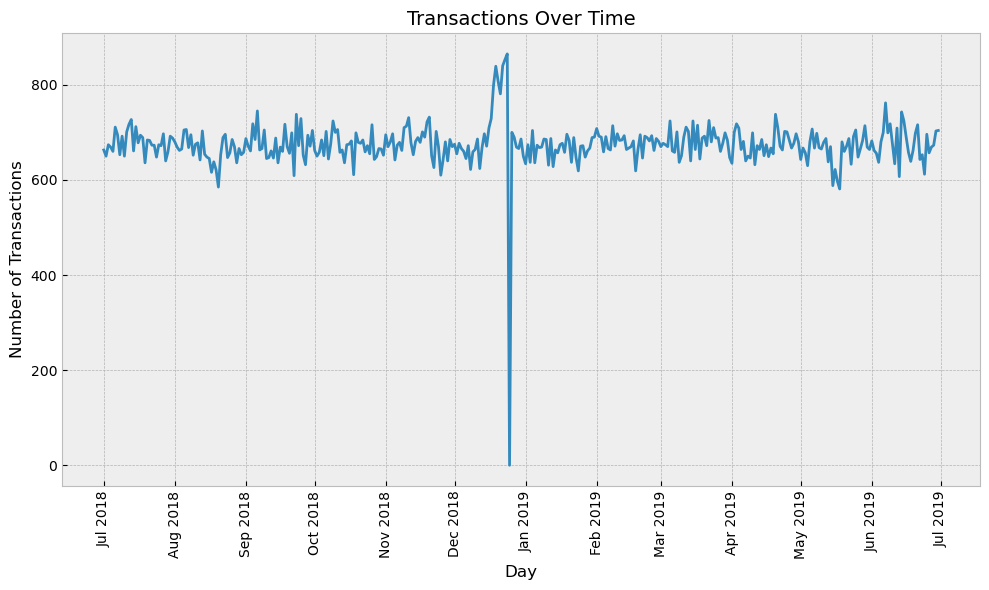

In [24]:
#plot transaction by date
plt.figure(figsize=(10, 6))
plt.plot(data_full_dates['DATE'], data_full_dates['Transaction_Count'], marker='', linestyle='-')
plt.title('Transactions Over Time', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90)
plt.grid(True)
plt.style.use('bmh')
plt.tight_layout()
plt.show()


In [26]:
# zoom into the transactions for the month of December,  Filter for December 2018
december_data = data_full_dates[(data_full_dates['DATE'] >= '2018-12-01') & (data_full_dates['DATE'] <= '2018-12-31')]


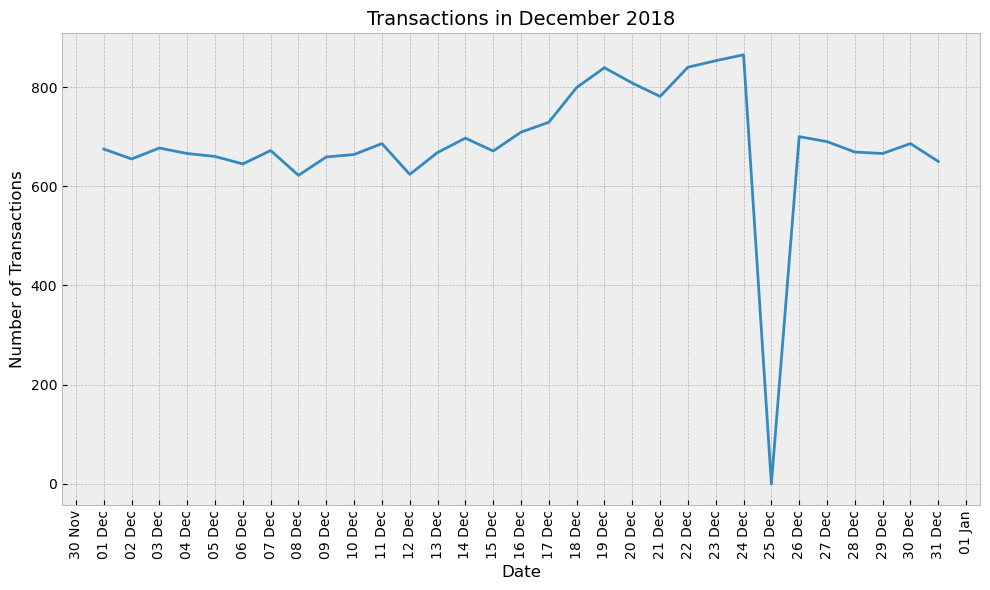

In [27]:
#plot transaction by the month of december on a daily observation.
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['Transaction_Count'], marker='', linestyle='-')
plt.title('Transactions in December 2018', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Format the dates on the x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set major ticks to be at every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format major ticks as 'Day Month'

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Extract digits fro our product name, the gram sizes and convert the result to numeric
# The regular expression \d+ matches one or more digits
data['Pack_Size'] = data['Prod_name'].str.extract('(\d+)').astype(int)
print(data[['Prod_name', 'Pack_Size']].head())



                                  Prod_name  Pack_Size
0            Natural ChipCompny SeaSalt175g        175
1                     CCs Nacho Cheese 175g        175
2     Smiths Crinkle Cut Chips Chicken 170g        170
3    Old El Paso Salsa Dip Tomato Mild 300g        300
4  Smiths Crinkle Chips Salt & Vinegar 330g        330


In [32]:
#summary statistcs of our pack size to understand
print(data['Pack_Size'].describe())

count    264124.000000
mean        182.394417
std          64.296475
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: Pack_Size, dtype: float64


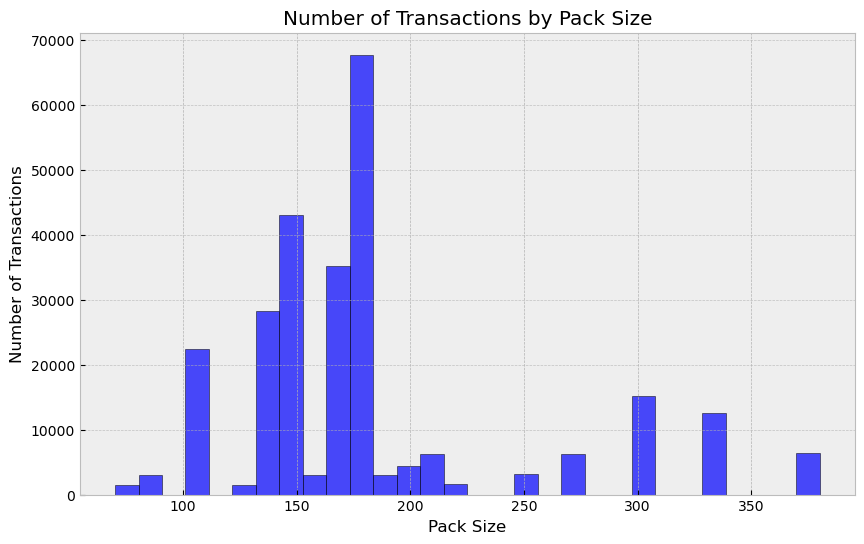

In [37]:
#show plots by number of transactions by Pack Size
plt.figure(figsize=(10, 6))
plt.hist(data['Pack_Size'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Number of Transactions by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [38]:
#Validate transactions count in the y Axis
transaction_counts_by_pack_size = data['Pack_Size'].value_counts()
print(transaction_counts_by_pack_size)


175    66222
150    43009
134    25012
110    22335
170    19933
165    15264
300    15126
330    12480
380     6388
210     6258
270     6253
200     4473
135     3251
250     3158
90      3008
190     2994
160     2970
220     1564
70      1507
180     1465
125     1454
Name: Pack_Size, dtype: int64


In [39]:
#create a new column containing the brand of the product by extracting it from the Prod_name
data['Brand'] = data['Prod_name'].str.split().str[0]

print(data[['Prod_name', 'Brand']].head())

                                  Prod_name    Brand
0            Natural ChipCompny SeaSalt175g  Natural
1                     CCs Nacho Cheese 175g      CCs
2     Smiths Crinkle Cut Chips Chicken 170g   Smiths
3    Old El Paso Salsa Dip Tomato Mild 300g      Old
4  Smiths Crinkle Chips Salt & Vinegar 330g   Smiths


In [40]:
brand_counts = data['Brand'].value_counts()
print(brand_counts)


Kettle        41108
Smiths        31754
Doritos       28072
Pringles      25011
Infuzions     14173
Thins         14049
RRD           11874
WW            10320
Cobs           9669
Tostitos       9443
Twisties       9411
Old            9284
Grain          7723
Tyrrells       6428
Natural        6037
Red            5870
Cheezels       4583
CCs            4551
Woolworths     4437
Sunbites       3008
Cheetos        2921
Burger         1564
French         1418
NCC            1416
Name: Brand, dtype: int64


In [43]:
#Standardize some data formats for consistency
data['Brand'] = data['Brand'].replace({'Red': 'Red Rock Deli', 'RRD': 'Red Rock Deli', 'WW': 'Woolworths'})
print(data[['Prod_name', 'Brand']].head())


                                  Prod_name    Brand
0            Natural ChipCompny SeaSalt175g  Natural
1                     CCs Nacho Cheese 175g      CCs
2     Smiths Crinkle Cut Chips Chicken 170g   Smiths
3    Old El Paso Salsa Dip Tomato Mild 300g      Old
4  Smiths Crinkle Chips Salt & Vinegar 330g   Smiths


In [44]:
brand_counts = data['Brand'].value_counts()
print(brand_counts)


Kettle           41108
Smiths           31754
Doritos          28072
Pringles         25011
Red Rock Deli    17744
Woolworths       14757
Infuzions        14173
Thins            14049
Cobs              9669
Tostitos          9443
Twisties          9411
Old               9284
Grain             7723
Tyrrells          6428
Natural           6037
Cheezels          4583
CCs               4551
Sunbites          3008
Cheetos           2921
Burger            1564
French            1418
NCC               1416
Name: Brand, dtype: int64


In [47]:
#Calculate total sales by lifestage and premium customer
total_sales_by_segment = data.groupby(['Lifestage', 'Premium Customer'])['TOT_SALES'].sum().reset_index()

# Sort the DataFrame by 'Total_Sales' in descending order
total_sales_by_segment = total_sales_by_segment.sort_values(by='TOT_SALES', ascending=False).reset_index(drop=True)

print(total_sales_by_segement)

                 Lifestage Premium Customer  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35266.10
1   MIDAGE SINGLES/COUPLES       Mainstream   90121.60
2   MIDAGE SINGLES/COUPLES          Premium   58081.05
3             NEW FAMILIES           Budget   21847.85
4             NEW FAMILIES       Mainstream   16940.35
5             NEW FAMILIES          Premium   11450.50
6           OLDER FAMILIES           Budget  167085.25
7           OLDER FAMILIES       Mainstream  102497.50
8           OLDER FAMILIES          Premium   79976.80
9    OLDER SINGLES/COUPLES           Budget  135703.20
10   OLDER SINGLES/COUPLES       Mainstream  132473.00
11   OLDER SINGLES/COUPLES          Premium  131326.25
12                RETIREES           Budget  112303.20
13                RETIREES       Mainstream  154893.15
14                RETIREES          Premium   97018.80
15          YOUNG FAMILIES           Budget  138262.20
16          YOUNG FAMILIES       Mainstream   92026.75
17        

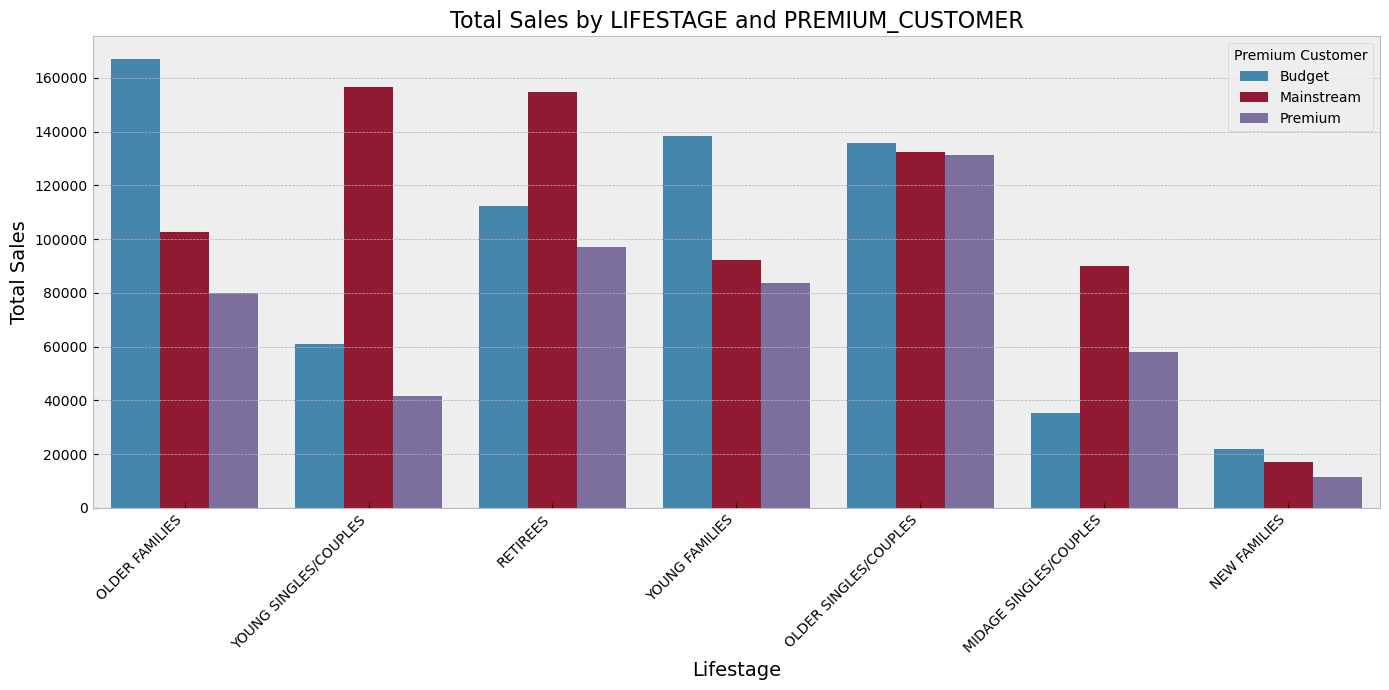

In [48]:
plt.figure(figsize=(14, 7))

# Create a barplot
sns.barplot(
    data=total_sales_by_segment,
    x='Lifestage',
    y='TOT_SALES',
    hue='Premium Customer'
)

# Add labels and title
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

In [50]:
#Calculate the Number of Unique Customers by Segment
customers_by_segment = data.groupby(['Lifestage', 'Premium Customer'])['LYLTY_CARD_NBR'].nunique().reset_index(name='Number_of_Customers')
print(customers_by_segment)



                 Lifestage Premium Customer  Number_of_Customers
0   MIDAGE SINGLES/COUPLES           Budget                 1500
1   MIDAGE SINGLES/COUPLES       Mainstream                 3336
2   MIDAGE SINGLES/COUPLES          Premium                 2431
3             NEW FAMILIES           Budget                 1112
4             NEW FAMILIES       Mainstream                  849
5             NEW FAMILIES          Premium                  588
6           OLDER FAMILIES           Budget                 4669
7           OLDER FAMILIES       Mainstream                 2831
8           OLDER FAMILIES          Premium                 2272
9    OLDER SINGLES/COUPLES           Budget                 4924
10   OLDER SINGLES/COUPLES       Mainstream                 4924
11   OLDER SINGLES/COUPLES          Premium                 4750
12                RETIREES           Budget                 4450
13                RETIREES       Mainstream                 6477
14                RETIREE

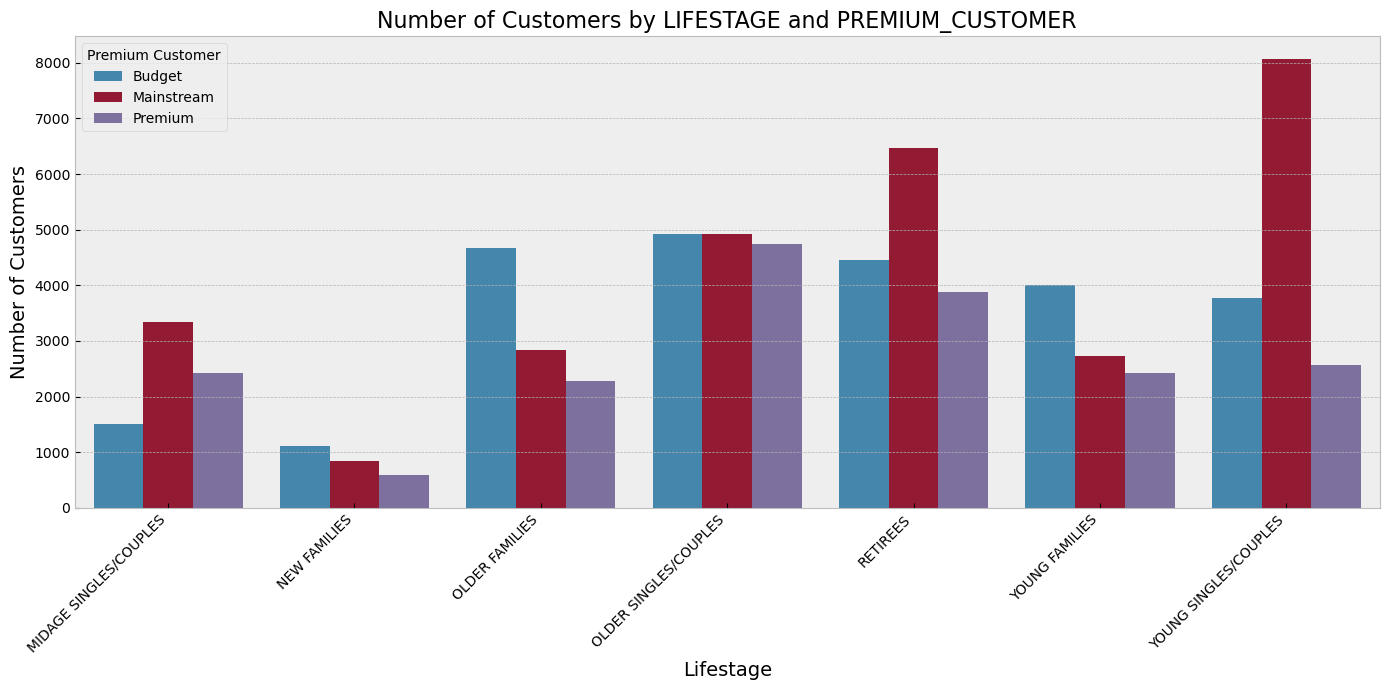

In [54]:
plt.figure(figsize=(14, 7))

# Create a barplot
sns.barplot(
    data=customers_by_segment,
    x='Lifestage',
    y='Number_of_Customers',
    hue='Premium Customer'
)

# Add labels and title
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()


In [58]:
# Calculate Average Units of chips been bought by per Customer by Segment
total_units_by_customer = data.groupby(['Lifestage', 'Premium Customer', 'LYLTY_CARD_NBR'])['PROD_QTY'].sum().reset_index(name='Total_Units')
average_units_per_customer = total_units_by_customer.groupby(['Lifestage', 'Premium Customer'])['Total_Units'].mean().reset_index(name='Average_Units_Per_Customer')

print(average_units_per_customer)




                 Lifestage Premium Customer  Average_Units_Per_Customer
0   MIDAGE SINGLES/COUPLES           Budget                    6.288667
1   MIDAGE SINGLES/COUPLES       Mainstream                    6.757794
2   MIDAGE SINGLES/COUPLES          Premium                    6.352941
3             NEW FAMILIES           Budget                    4.994604
4             NEW FAMILIES       Mainstream                    5.065960
5             NEW FAMILIES          Premium                    5.013605
6           OLDER FAMILIES           Budget                    9.590276
7           OLDER FAMILIES       Mainstream                    9.722360
8           OLDER FAMILIES          Premium                    9.507482
9    OLDER SINGLES/COUPLES           Budget                    7.104590
10   OLDER SINGLES/COUPLES       Mainstream                    7.065597
11   OLDER SINGLES/COUPLES          Premium                    7.110526
12                RETIREES           Budget                    6

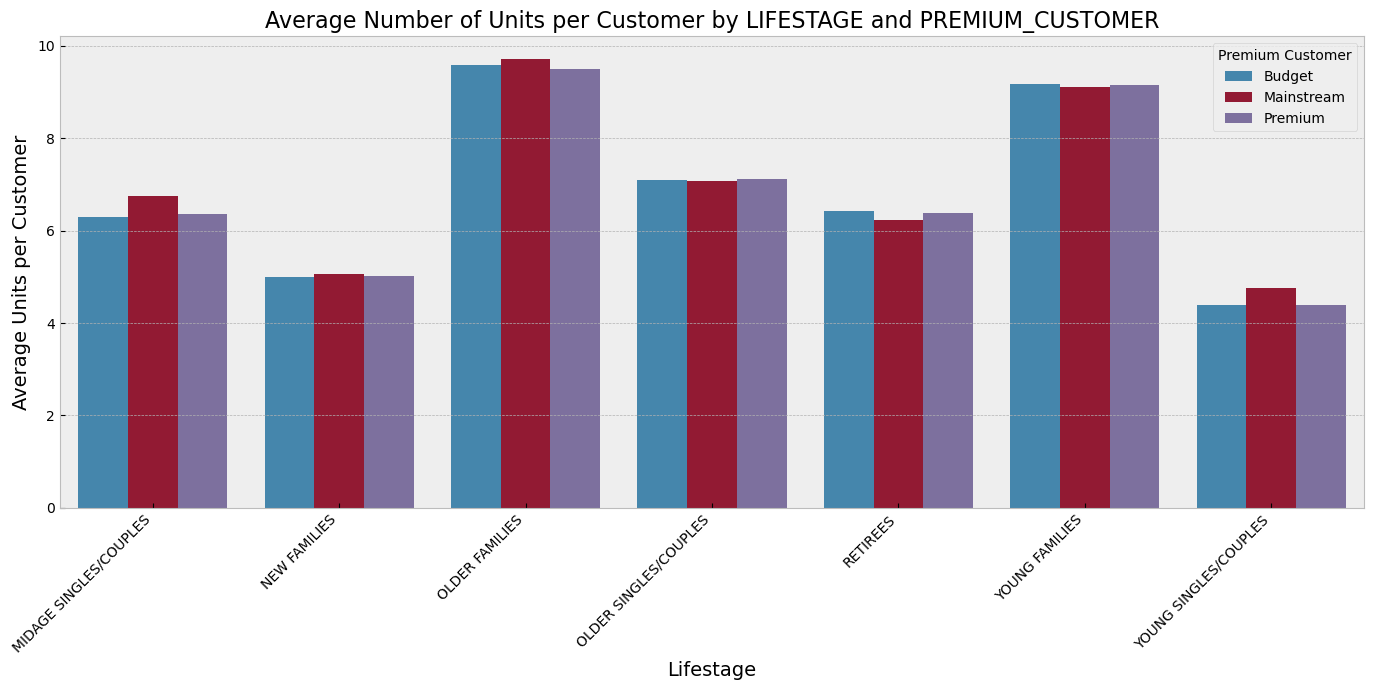

In [59]:
plt.figure(figsize=(14, 7))

# Create a barplot
sns.barplot(
    data=average_units_per_customer,
    x='Lifestage',
    y='Average_Units_Per_Customer',
    hue='Premium Customer'
)

# Add labels and title
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Average Units per Customer', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

In [60]:
#investigate the average price per unit of chips bought for each customer segment
data['Price_Per_Unit'] = data['TOT_SALES'] / data['PROD_QTY']
average_price_per_unit = data.groupby(['Lifestage', 'Premium Customer'])['Price_Per_Unit'].mean().reset_index(name='Average_Price_Per_Unit')
print(average_price_per_unit)

                 Lifestage Premium Customer  Average_Price_Per_Unit
0   MIDAGE SINGLES/COUPLES           Budget                3.727777
1   MIDAGE SINGLES/COUPLES       Mainstream                3.998678
2   MIDAGE SINGLES/COUPLES          Premium                3.751555
3             NEW FAMILIES           Budget                3.918144
4             NEW FAMILIES       Mainstream                3.916114
5             NEW FAMILIES          Premium                3.870951
6           OLDER FAMILIES           Budget                3.731186
7           OLDER FAMILIES       Mainstream                3.725774
8           OLDER FAMILIES          Premium                3.703340
9    OLDER SINGLES/COUPLES           Budget                3.874875
10   OLDER SINGLES/COUPLES       Mainstream                3.801921
11   OLDER SINGLES/COUPLES          Premium                3.885507
12                RETIREES           Budget                3.923024
13                RETIREES       Mainstream     

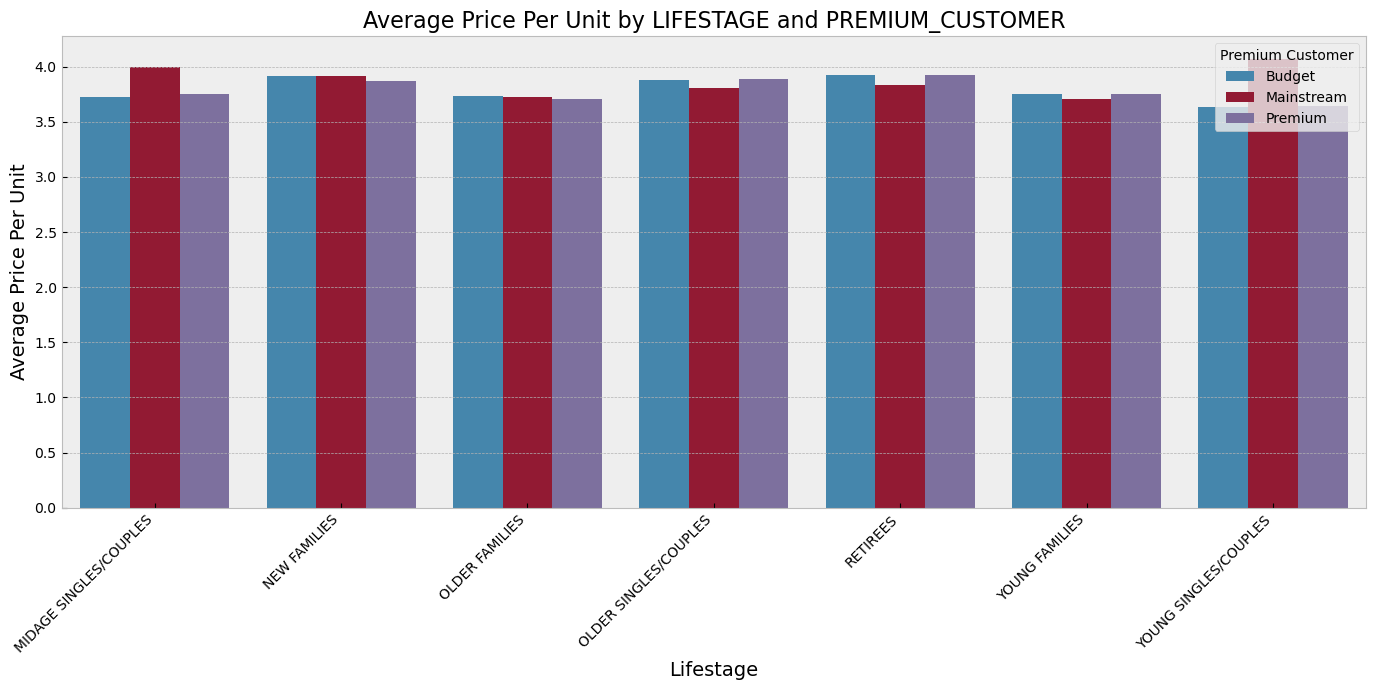

In [61]:
plt.figure(figsize=(14, 7))

# Create a barplot
sns.barplot(
    data=average_price_per_unit,
    x='Lifestage',
    y='Average_Price_Per_Unit',
    hue='Premium Customer'
)

# Add labels and title
plt.title('Average Price Per Unit by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Average Price Per Unit', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()


In [62]:
from scipy import stats

In [63]:
#Perform a t-test between 'Mainstream' vs 'Premium' and 'Budget' (from PREMIUM_CUSTOMER column).
# Filter the groups
mainstream = data[(data['Premium Customer'] == 'Mainstream')]
premium_budget = data[(data['Premium Customer'] == 'Premium') | (data['Premium Customer'] == 'Budget')]

t_stat, p_value = stats.ttest_ind(mainstream['Price_Per_Unit'], premium_budget['Price_Per_Unit'], equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')




T-statistic: 15.763521106489366, P-value: 5.953751927996592e-56


In [64]:
# Filter the groups
midage = data[(data['Lifestage'] == 'MIDAGE SINGLES/COUPLES')]
young = data[(data['Lifestage'] == 'YOUNG SINGLES/COUPLES')]

t_stat, p_value = stats.ttest_ind(midage['Price_Per_Unit'], young['Price_Per_Unit'], equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')



T-statistic: -2.5702828729648974, P-value: 0.010164221476467538
